In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
#importing the data 
data = pd.read_csv('../data/G-data.csv', header = None, names = ['x', 'y'])
data.head()

,x,y
0,8.724514,16.680705
1,8.111094,14.039865
2,3.891538,11.217337
3,6.595019,16.108606
4,9.159665,15.282327


In [9]:
#checking if there are any null values
data.isnull().sum()

x    0
y    0
dtype: int64

In [11]:
#checking if data type if numerical 
data.dtypes

x    float64
y    float64
dtype: object

### 1. Anomaly Detection using Parametric Models

Text(0, 0.5, 'y')

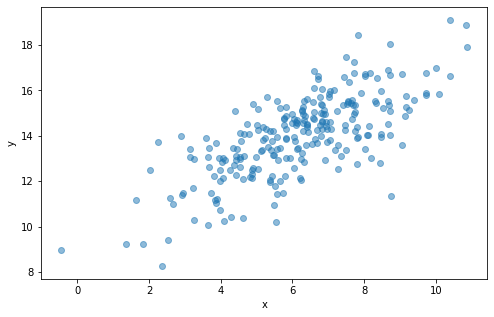

In [15]:
fig = plt.figure(figsize=(8,5))
plt.scatter(data.x, data.y, alpha = 0.5)
plt.xlabel("x")
plt.ylabel("y")


Assuming the data follows a multivariate Gaussian distribution, we can compute the mean and covariance matrix of the 2-dimensional data as follows

In [16]:
mean = data.mean()
cov = data.cov()
print(mean)
print(cov)

x     6.161942
y    14.004147
dtype: float64
          x         y
x  3.541314  2.449140
y  2.449140  3.230053


In [17]:
from numpy.linalg import inv
X = data.values
S = cov.values

In [19]:
for i in range(2): 
    X[:,i] = X[:,i] - mean[i]

In [20]:
def mahalanobis(row):
    return np.matmul(row,S).dot(row)

In [22]:
anomaly_score = np.apply_along_axis( mahalanobis, axis=1, arr=X)

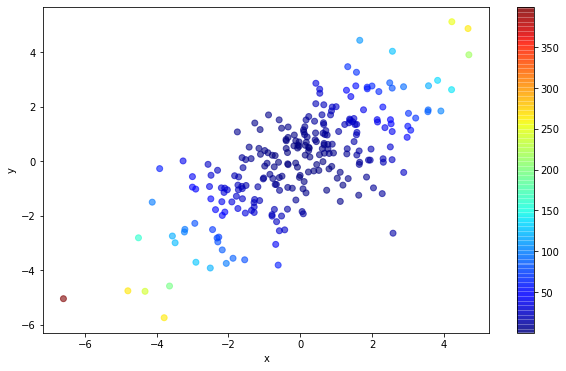

In [30]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(data.x, data.y, c = anomaly_score, cmap = 'jet', alpha = 0.6)
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.colorbar(p)

The top anomaly can be seen in the lower left corner of the plot in color brown

In [24]:
anom = pd.DataFrame(anomaly_score, index=data.index, columns=['Anomaly score'])

In [25]:
anom.head()

,Anomaly score
0,79.991639
1,13.799273
2,74.332446
3,19.433533
4,55.868925


In [26]:
# TOP 5 points detected as anomaly
result = pd.concat((data, anom), axis = 1) 
result.nlargest(5, 'Anomaly score')

,x,y,Anomaly score
8,-6.600549,-5.045834,399.662410
94,-4.804438,-4.756795,266.773486
89,4.675894,4.860870,265.079681
26,-3.793011,-5.744357,264.258449
204,4.224742,5.111333,253.368184


### Part II: Using Distance Based Models

#### a) Using Compound Dataset

In [53]:
#importing the data 
data = pd.read_csv('../data/compound.txt', header = None, names = ['x', 'y', '-'],  delimiter = "\t")
data.drop(data.columns[2], axis = 1, inplace = True)
data.head()

,x,y
0,26.75,22.15
1,29.80,22.15
2,31.55,21.10
3,27.70,20.85
4,29.90,19.95


In [54]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

knn = 1
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(data.values)
distances, indices = nbrs.kneighbors(data.values)

In [55]:
anomaly_score = distances[:,knn-1]


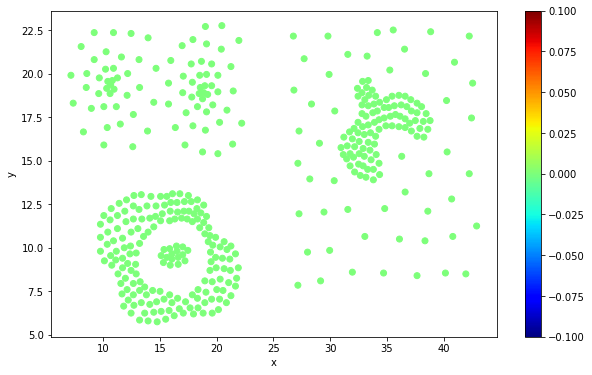

In [56]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(data.x, data.y, c = anomaly_score, cmap = 'jet')
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.colorbar(p)


In [57]:
#getting TOP 5 anomalies 
anom = pd.DataFrame(anomaly_score, index=data.index, columns=['Anomaly score'])
result = pd.concat((data,anom), axis=1)
result.nlargest(5,'Anomaly score')

,x,y,Anomaly score
0,26.75,22.15,0.0
1,29.80,22.15,0.0
2,31.55,21.10,0.0
3,27.70,20.85,0.0
4,29.90,19.95,0.0


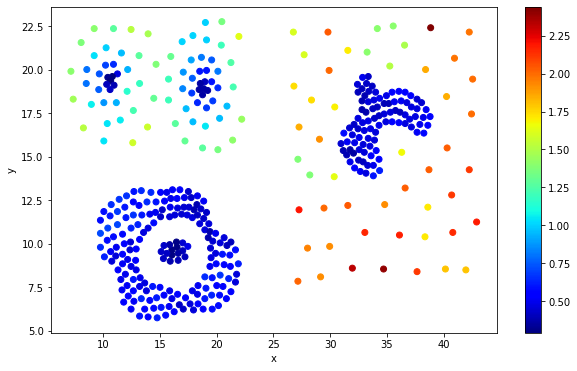

In [60]:
knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(data.values)
distances, indices = nbrs.kneighbors(data.values)

anomaly_score = distances[:,knn-1]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(data.x, data.y, c = anomaly_score, cmap = 'jet')
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.colorbar(p)


In [61]:
#getting TOP 5 anomalies 
anom = pd.DataFrame(anomaly_score, index=data.index, columns=['Anomaly score'])
result = pd.concat((data,anom), axis=1)
result.nlargest(5,'Anomaly score')

,x,y,Anomaly score
43,38.85,22.40,2.441823
22,34.70,8.55,2.400521
21,31.95,8.60,2.326478
13,27.25,11.95,2.202272
36,42.90,11.25,2.184033


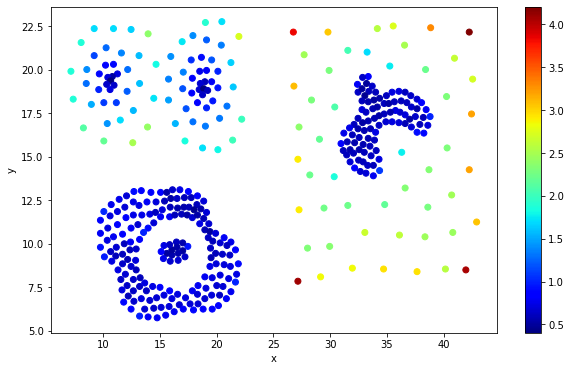

In [62]:
knn = 5
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(data.values)
distances, indices = nbrs.kneighbors(data.values)

anomaly_score = distances[:,knn-1]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(data.x, data.y, c = anomaly_score, cmap = 'jet')
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.colorbar(p)


In [63]:
#getting TOP 5 anomalies 
anom = pd.DataFrame(anomaly_score, index=data.index, columns=['Anomaly score'])
result = pd.concat((data,anom), axis=1)
result.nlargest(5,'Anomaly score')

,x,y,Anomaly score
42,42.25,22.15,4.205948
19,27.15,7.85,4.101219
37,41.95,8.50,4.070626
0,26.75,22.15,3.842200
43,38.85,22.40,3.301515


After comparing the scatter plots for k= 1, 2, and 5 we observe that k = 2 is the best in recognizing the anomalies in our dataset. On the other hand, k = 1 performs the worst

### b) Using flame dataset

In [64]:
#importing the data 
data = pd.read_csv('../data/flame.txt', header = None, names = ['x', 'y', '-'],  delimiter = "\t")
data.drop(data.columns[2], axis = 1, inplace = True)
data.head()

,x,y
0,1.85,27.80
1,1.35,26.65
2,1.40,23.25
3,0.85,23.05
4,0.50,22.35


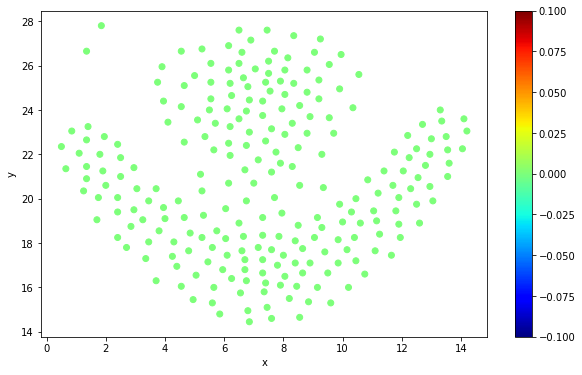

In [65]:
knn = 1
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(data.values)
distances, indices = nbrs.kneighbors(data.values)


anomaly_score = distances[:,knn-1]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(data.x, data.y, c = anomaly_score, cmap = 'jet')
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.colorbar(p)

In [66]:
#getting TOP 5 anomalies 
anom = pd.DataFrame(anomaly_score, index=data.index, columns=['Anomaly score'])
result = pd.concat((data,anom), axis=1)
result.nlargest(5,'Anomaly score')

,x,y,Anomaly score
0,1.85,27.80,0.0
1,1.35,26.65,0.0
2,1.40,23.25,0.0
3,0.85,23.05,0.0
4,0.50,22.35,0.0


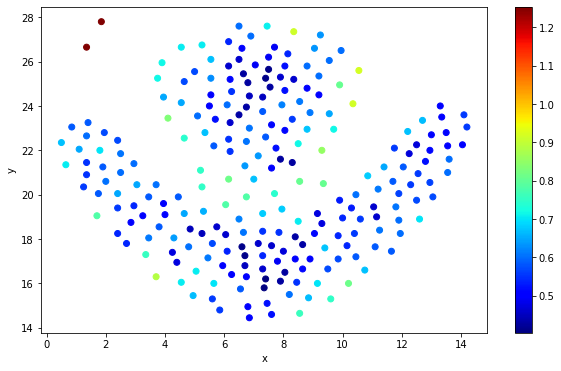

In [67]:
knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(data.values)
distances, indices = nbrs.kneighbors(data.values)


anomaly_score = distances[:,knn-1]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(data.x, data.y, c = anomaly_score, cmap = 'jet')
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.colorbar(p)

In [68]:
#getting TOP 5 anomalies 
anom = pd.DataFrame(anomaly_score, index=data.index, columns=['Anomaly score'])
result = pd.concat((data,anom), axis=1)
result.nlargest(5,'Anomaly score')

,x,y,Anomaly score
0,1.85,27.80,1.253994
1,1.35,26.65,1.253994
204,10.55,25.60,0.919239
192,10.35,24.10,0.917878
201,8.35,27.35,0.912414


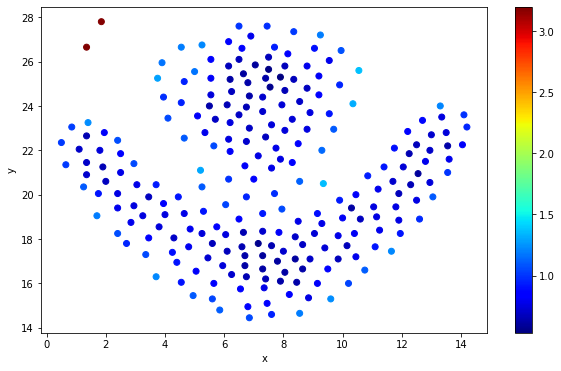

In [69]:
knn = 5
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(data.values)
distances, indices = nbrs.kneighbors(data.values)


anomaly_score = distances[:,knn-1]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(data.x, data.y, c = anomaly_score, cmap = 'jet')
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.colorbar(p)

In [70]:
#getting TOP 5 anomalies 
anom = pd.DataFrame(anomaly_score, index=data.index, columns=['Anomaly score'])
result = pd.concat((data,anom), axis=1)
result.nlargest(5,'Anomaly score')

,x,y,Anomaly score
1,1.35,26.65,3.200000
0,1.85,27.80,3.180016
204,10.55,25.60,1.372953
158,9.35,20.50,1.364734
192,10.35,24.10,1.320984


After comparing the scatter plots for k = 1, 2, and 5, we observe that k = 2 performs the best

### c) Using Pathbased dataset

In [71]:
#importing the data 
data = pd.read_csv('../data/pathbased.txt', header = None, names = ['x', 'y', '-'],  delimiter = "\t")
data.drop(data.columns[2], axis = 1, inplace = True)
data.head()

,x,y
0,11.25,5.05
1,10.95,4.70
2,9.85,5.80
3,9.80,5.75
4,9.15,6.80


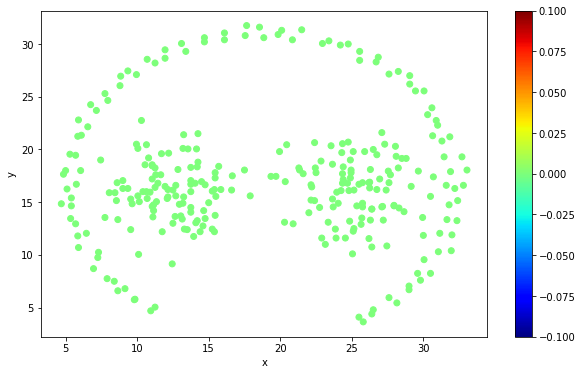

In [76]:
knn = 1
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(data.values)
distances, indices = nbrs.kneighbors(data.values)
anomaly_score = distances[:,knn-1]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(data.x, data.y, c = anomaly_score, cmap = 'jet')
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.colorbar(p)

In [77]:
#getting TOP 5 anomalies 
anom = pd.DataFrame(anomaly_score, index=data.index, columns=['Anomaly score'])
result = pd.concat((data,anom), axis=1)
result.nlargest(5,'Anomaly score')

,x,y,Anomaly score
0,11.25,5.05,0.0
1,10.95,4.70,0.0
2,9.85,5.80,0.0
3,9.80,5.75,0.0
4,9.15,6.80,0.0


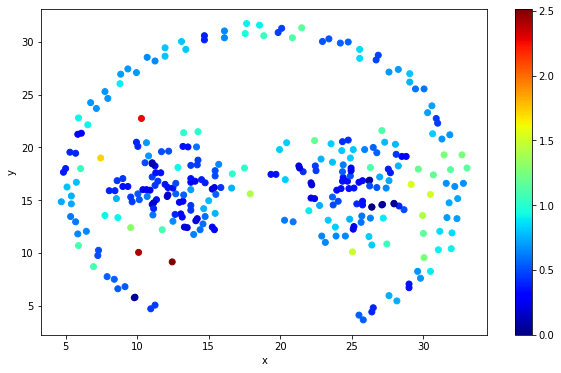

In [78]:
knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(data.values)
distances, indices = nbrs.kneighbors(data.values)
anomaly_score = distances[:,knn-1]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(data.x, data.y, c = anomaly_score, cmap = 'jet')
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.colorbar(p)

In [79]:
#getting TOP 5 anomalies 
anom = pd.DataFrame(anomaly_score, index=data.index, columns=['Anomaly score'])
result = pd.concat((data,anom), axis=1)
result.nlargest(5,'Anomaly score')

,x,y,Anomaly score
202,12.45,9.15,2.516446
203,10.10,10.05,2.413504
270,10.30,22.75,2.277060
266,7.45,19.00,1.720465
106,29.15,16.50,1.533786


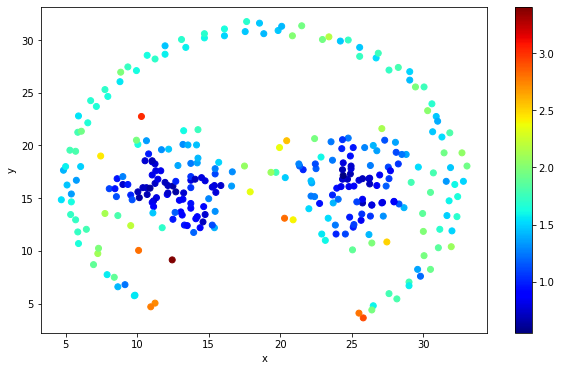

In [80]:
knn = 5
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(data.values)
distances, indices = nbrs.kneighbors(data.values)
anomaly_score = distances[:,knn-1]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(data.x, data.y, c = anomaly_score, cmap = 'jet')
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.colorbar(p)

In [81]:
#getting TOP 5 anomalies 
anom = pd.DataFrame(anomaly_score, index=data.index, columns=['Anomaly score'])
result = pd.concat((data,anom), axis=1)
result.nlargest(5,'Anomaly score')

,x,y,Anomaly score
202,12.45,9.15,3.407712
270,10.30,22.75,3.022003
101,25.80,3.65,2.920616
144,20.30,13.10,2.821790
203,10.10,10.05,2.807134


By comparing the scatter plots for k = 1, 2 and 5 we observe that k = 5 performs the best in terms of detecting the anomalies